In [1]:
import sys
root_dir = '../../../'
sys.path.append(root_dir)

In [2]:
import pickle
from utils import *
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Load data

In [4]:
df = pd.read_csv('../02_daemon/w-e-df.csv', header=None)
df.head()

,0,1,2,3,4,5
0,0.184321,0.003148,0.352941,0.352941,0.000000,0.0
1,0.185555,0.014912,0.471698,0.245283,0.269076,0.0
2,0.111316,0.015870,0.686275,0.568627,0.050223,1.0
3,0.026690,0.011292,0.942029,0.942029,0.000000,1.0
4,0.154010,0.012084,0.581818,0.436364,0.267591,0.0


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=23
)

## SVM Classifier

In [6]:
param_grid = {
    'C': [1, 3, 5],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
estimator = SVC()
svc = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid,
    scoring = 'accuracy'
)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [7]:
print(f'best estimator:\t\t{svc.best_estimator_}')
print(f'best params:\t\t{svc.best_params_}')
print(f'accuracy:\t\t{accuracy_score(y_test, y_pred)}')
print('\nClassification report:')
print(classification_report(y_test, y_pred))

best estimator:		SVC(C=5)
best params:		{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
accuracy:		0.7387429643527205

Classification report:
              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74      1069
         1.0       0.74      0.74      0.74      1063

    accuracy                           0.74      2132
   macro avg       0.74      0.74      0.74      2132
weighted avg       0.74      0.74      0.74      2132



In [8]:
with open('w-e-svc.pickle', 'wb') as f:
    pickle.dump(svc, f)

## KNN Classifier

In [9]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
    'weights': ['uniform', 'distance'],
    'leaf_size': [5, 10, 15, 20, 25, 30]
}
estimator = KNeighborsClassifier()
knn = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid,
    scoring = 'accuracy'
)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [10]:
print(f'best estimator:\t\t{knn.best_estimator_}')
print(f'best params:\t\t{knn.best_params_}')
print(f'accuracy:\t\t{accuracy_score(y_test, y_pred)}')
print('\nClassification report:')
print(classification_report(y_test, y_pred))

best estimator:		KNeighborsClassifier(leaf_size=5, n_neighbors=17, weights='distance')
best params:		{'leaf_size': 5, 'n_neighbors': 17, 'weights': 'distance'}
accuracy:		0.7772045028142589

Classification report:
              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79      1069
         1.0       0.80      0.73      0.77      1063

    accuracy                           0.78      2132
   macro avg       0.78      0.78      0.78      2132
weighted avg       0.78      0.78      0.78      2132



In [11]:
with open('w-e-knn.pickle', 'wb') as f:
    pickle.dump(knn, f)

## Logistic Regression

In [12]:
logreg = LogisticRegression()

param_grid = {
    'C': [1, 3, 5], 
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [1000]

}
estimator = LogisticRegression()
logreg = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid,
    scoring = 'accuracy'
)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [13]:
print(f'best estimator:\t\t{logreg.best_estimator_}')
print(f'best params:\t\t{logreg.best_params_}')
print(f'accuracy:\t\t{accuracy_score(y_test, y_pred)}')
print('\nClassification report:')
print(classification_report(y_test, y_pred))

best estimator:		LogisticRegression(C=1, max_iter=1000, solver='newton-cg')
best params:		{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy:		0.7368667917448405

Classification report:
              precision    recall  f1-score   support

         0.0       0.73      0.74      0.74      1069
         1.0       0.74      0.73      0.73      1063

    accuracy                           0.74      2132
   macro avg       0.74      0.74      0.74      2132
weighted avg       0.74      0.74      0.74      2132



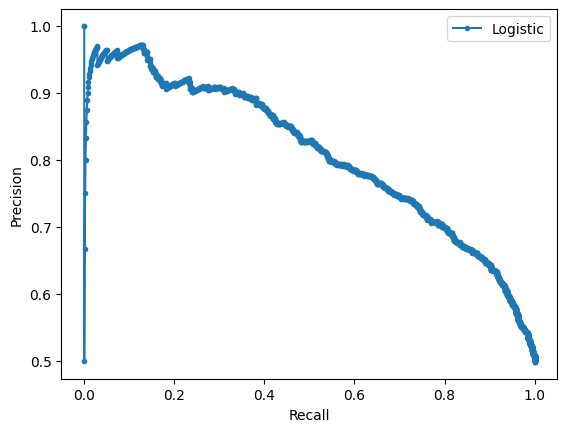

In [14]:
lr_probs = logreg.predict_proba(X_test)
lr_probs = lr_probs[:, 1]  # keep probabilities for the positive outcome only
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [15]:
with open('w-e-logreg.pickle', 'wb') as f:
    pickle.dump(logreg, f)

## Gradient Boosting Classifier

In [16]:
param_grid = {
    'learning_rate': [0.01, 0.1 ], 
    'n_estimators': [100, 500, 1000]
}
estimator = GradientBoostingClassifier()
gradboost = GridSearchCV(
    estimator = estimator,
    param_grid = param_grid,
    scoring = 'accuracy'
)
gradboost.fit(X_train, y_train)
y_pred = gradboost.predict(X_test)

In [17]:
print(f'best estimator:\t\t{gradboost.best_estimator_}')
print(f'best params:\t\t{gradboost.best_params_}')
print(f'accuracy:\t\t{accuracy_score(y_test, y_pred)}')
print('\nClassification report:')
print(classification_report(y_test, y_pred))

best estimator:		GradientBoostingClassifier(n_estimators=500)
best params:		{'learning_rate': 0.1, 'n_estimators': 500}
accuracy:		0.7945590994371482

Classification report:
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.80      1069
         1.0       0.81      0.77      0.79      1063

    accuracy                           0.79      2132
   macro avg       0.80      0.79      0.79      2132
weighted avg       0.79      0.79      0.79      2132



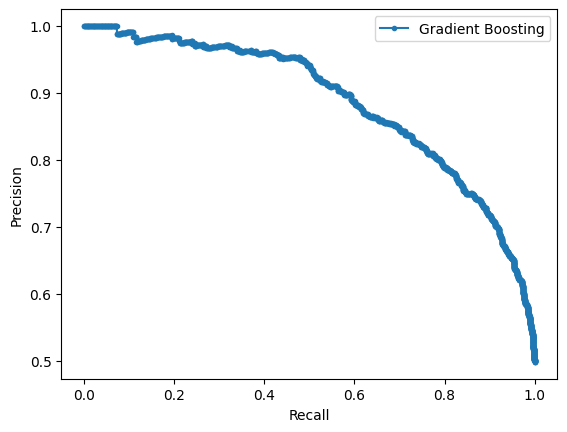

In [18]:
lr_probs = gradboost.predict_proba(X_test)
lr_probs = lr_probs[:, 1]  # keep probabilities for the positive outcome only
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
plt.plot(lr_recall, lr_precision, marker='.', label='Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [19]:
with open('w-e-gradboost.pickle', 'wb') as f:
    pickle.dump(gradboost, f)

## MLP Classifier

In [20]:
param_grid = {
    'solver': ['adam'], 
    'activation': ['relu']
}
estimator = MLPClassifier()
mlp = GridSearchCV(
    estimator = estimator,
    param_grid = param_grid,
    scoring = 'accuracy'
)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [21]:
print(f'best estimator:\t\t{mlp.best_estimator_}')
print(f'best params:\t\t{mlp.best_params_}')
print(f'accuracy:\t\t{accuracy_score(y_test, y_pred)}')
print('\nClassification report:')
print(classification_report(y_test, y_pred))

best estimator:		MLPClassifier()
best params:		{'activation': 'relu', 'solver': 'adam'}
accuracy:		0.7378048780487805

Classification report:
              precision    recall  f1-score   support

         0.0       0.72      0.77      0.75      1069
         1.0       0.75      0.70      0.73      1063

    accuracy                           0.74      2132
   macro avg       0.74      0.74      0.74      2132
weighted avg       0.74      0.74      0.74      2132



In [22]:
with open('w-e-mlp.pickle', 'wb') as f:
    pickle.dump(mlp, f)